In [2]:
pip install beautifulsoup4 lxml

Note: you may need to restart the kernel to use updated packages.


In [6]:
from bs4 import BeautifulSoup
import json
import urllib.request
import codecs
file = codecs.open("en2550_assignment_3.html", "r", "utf-8")
text = file.read()
#for local html file
#response = open("en2550_assignment_3.html")
#text = response.read()

soup = BeautifulSoup(text, 'lxml')

dictionary = {'nbformat': 4, 'nbformat_minor': 1, 'cells': [], 'metadata': {}}
for d in soup.findAll("div"):
    if 'class' in d.attrs.keys():
        for clas in d.attrs["class"]:
            if clas in ["text_cell_render", "input_area"]:
                # code cell
                if clas == "input_area":
                    cell = {}
                    cell['metadata'] = {}
                    cell['outputs'] = []
                    cell['source'] = [d.get_text()]
                    cell['execution_count'] = None
                    cell['cell_type'] = 'code'
                    dictionary['cells'].append(cell)

                else:
                    cell = {}
                    cell['metadata'] = {}

                    cell['source'] = [d.decode_contents()]
                    cell['cell_type'] = 'markdown'
                    dictionary['cells'].append(cell)
open('notebook.ipynb', 'w').write(json.dumps(dictionary))

65

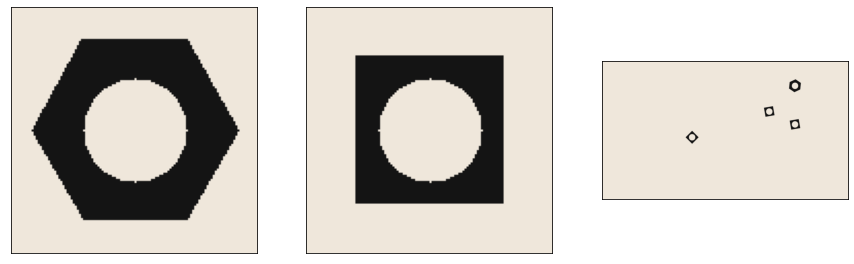

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(15,12))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

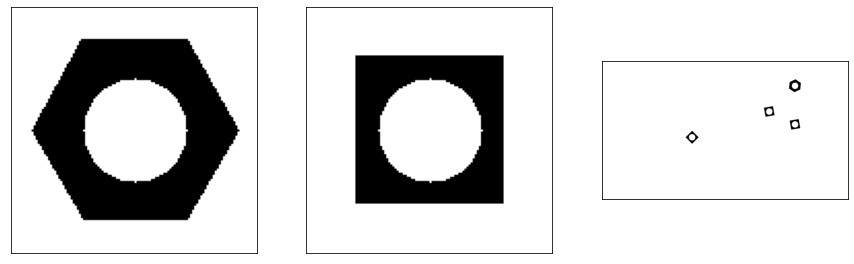

In [2]:
#grayscale images
hexnut_template=cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template=cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100=cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

# Otsu's thresholding
ret1,th1 = cv.threshold(hexnut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_f100,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3,figsize=(15,12))
ax[0].imshow(th1,'gray')
ax[1].imshow(th2,'gray')
ax[2].imshow(th3,'gray')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

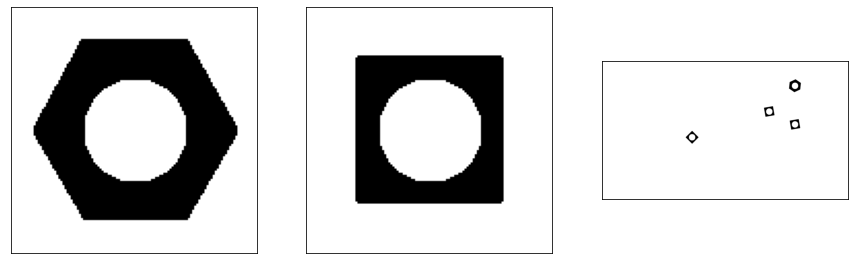

In [23]:
#grayscale images
hexnut_template=cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template=cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100=cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

# Otsu's thresholding after gaussian filtering
blur_hexnut_template = cv.GaussianBlur(hexnut_template,(5,5),0)
blur_squarenut_template = cv.GaussianBlur(squarenut_template,(5,5),0)
blur_conveyor_f100 = cv.GaussianBlur(conveyor_f100,(5,5),0)

ret1,th1 = cv.threshold(blur_hexnut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(blur_squarenut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(blur_conveyor_f100,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3,figsize=(15,12))
ax[0].imshow(th1,'gray')
ax[1].imshow(th2,'gray')
ax[2].imshow(th3,'gray')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

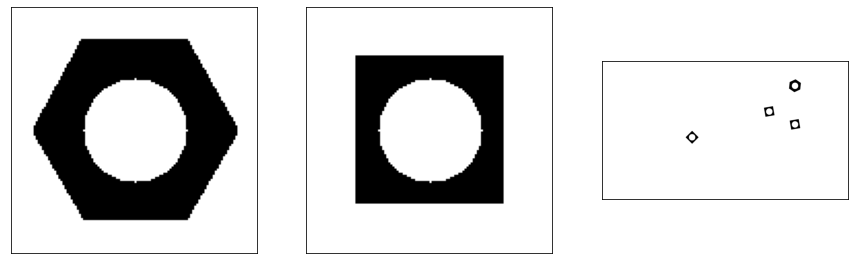

In [7]:
kernel = np.ones((3,3),np.uint8)
close1 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
close2 = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
close3 = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

fig,ax=plt.subplots(1,3,figsize=(15,12))
ax[0].imshow(close1,'gray')
ax[1].imshow(close2,'gray')
ax[2].imshow(close3,'gray')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

In [24]:
output1 = cv.connectedComponentsWithStats(th1, 8, cv.CV_32S)
output2 = cv.connectedComponentsWithStats(th2, 8, cv.CV_32S)
output3 = cv.connectedComponentsWithStats(th3, 8, cv.CV_32S)

# number of labels
num_labels = [output1[0],output2[0],output3[0]]
# label matrix
labels = [output1[1],output2[1],output3[1]]
# stat matrix
stats = [output1[2],output2[2],output3[2]]
# centroid matrix
centroids = [output1[3],output2[3],output3[3]]

#print(num_labels)

[3, 3, 6]


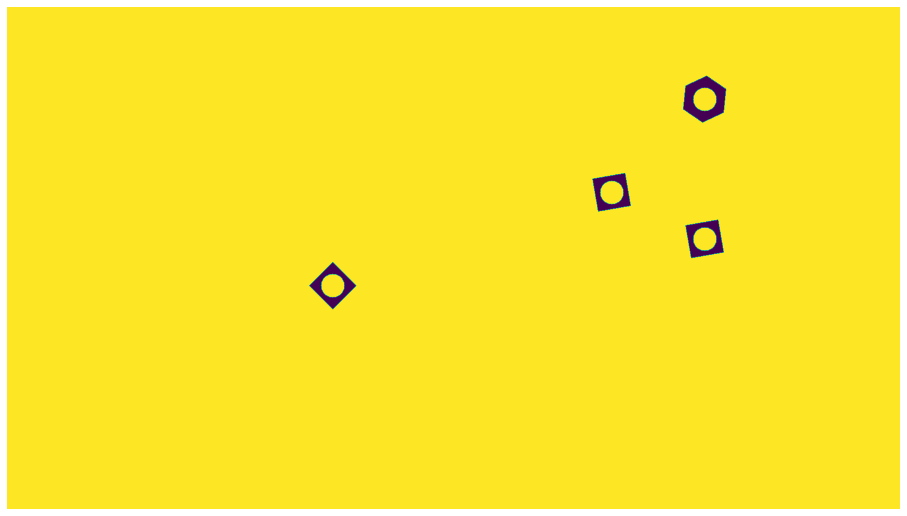

In [30]:
contours, hierarchy = cv.findContours(th3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cont_output = conveyor_f100.copy()
cv.drawContours(cv.cvtColor(cont_output, cv.COLOR_RGB2BGR), contours, -1, (0,255,0), 2, cv.LINE_AA)
plt.figure(figsize=(16, 20))
plt.imshow(cont_output)
plt.axis('off')
plt.show()

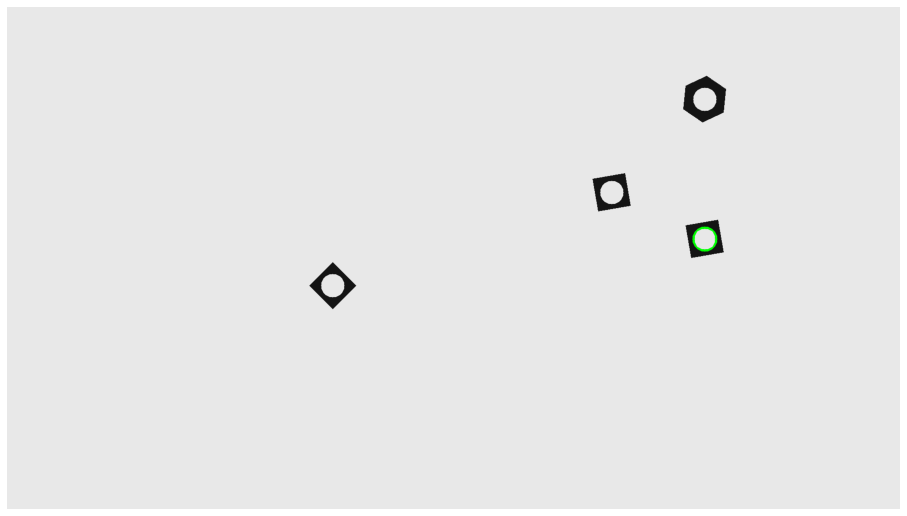

In [13]:
contours, hierarchy = cv.findContours(th3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = contours[4]
cont_output=cv.drawContours(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR), [cnt], 0, (0,255,0), 3)
plt.figure(figsize=(16, 20))
plt.imshow(cont_output)
plt.axis('off')
plt.show()

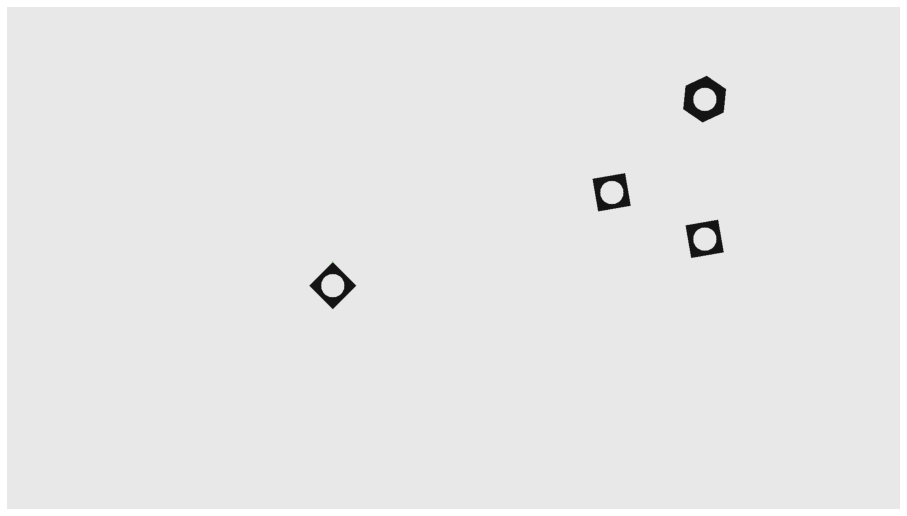

In [14]:
cnts, hierarchy = cv.findContours(th3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
c = max(cnts, key=cv.contourArea)
cont_output=cv.drawContours(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR), [c], -1, (36, 255, 12), 2)
plt.figure(figsize=(16, 20))
plt.imshow(cont_output)
plt.axis('off')
plt.show()

3223


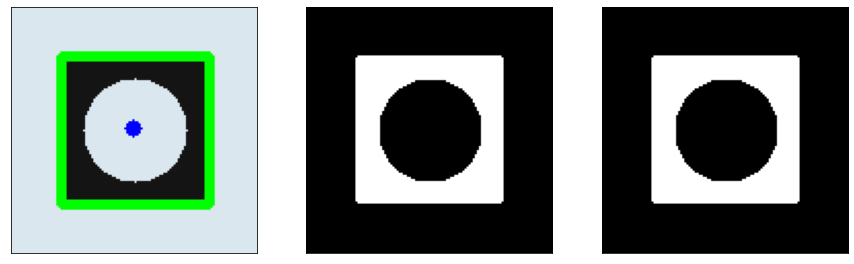

In [27]:
import cv2
import numpy as np
 
# Loading the image
img = cv2.imread('squarenut_template.png')  # 'conveyor_f100.png','hexnut_template.png'
 
# preprocess the image
gray_img = cv2.cvtColor(img ,
                        cv2.COLOR_BGR2GRAY)
 
# Applying 7x7 Gaussian Blur
blurred = cv2.GaussianBlur(gray_img, (7, 7), 0)
 
# Applying threshold
threshold = cv2.threshold(blurred, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
 
# Apply the Component analysis function
analysis = cv2.connectedComponentsWithStats(threshold,
                                            4,
                                            cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis
 
# Initialize a new image to
# store all the output components
output = np.zeros(gray_img.shape, dtype="uint8")
 
# Loop through each component
for i in range(1, totalLabels):
   
      # Area of the component
    area = values[i, cv2.CC_STAT_AREA]
    print(area)
    if (area > 3000) and (area < 5000):
        # Create a new image for bounding boxes
        new_img=img.copy()
         
        # Now extract the coordinate points
        x1 = values[i, cv2.CC_STAT_LEFT]
        y1 = values[i, cv2.CC_STAT_TOP]
        w = values[i, cv2.CC_STAT_WIDTH]
        h = values[i, cv2.CC_STAT_HEIGHT]
         
        # Coordinate of the bounding box
        pt1 = (x1, y1)
        pt2 = (x1+ w, y1+ h)
        (X, Y) = centroid[i]
         
        # Bounding boxes for each component
        cv2.rectangle(new_img,pt1,pt2,
                      (0, 255, 0), 3)
        cv2.circle(new_img, (int(X),
                             int(Y)),
                   4, (0, 0, 255), -1)
 
        # Create a new array to show individual component
        component = np.zeros(gray_img.shape, dtype="uint8")
        componentMask = (label_ids == i).astype("uint8") * 255
 
        # Apply the mask using the bitwise operator
        component = cv2.bitwise_or(component,componentMask)
        output = cv2.bitwise_or(output, componentMask)
         
        # Show the final images
        fig,ax=plt.subplots(1,3,figsize=(15,12))
        ax[0].imshow(new_img,'gray')
        ax[1].imshow(component,'gray')
        ax[2].imshow(output,'gray')
        for i in range(3):
            ax[i].set_xticks([])
            ax[i].set_yticks([])
        plt.show()
       

In [31]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
